In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from posture_detector.data import get_train_test_data
from posture_detector.models import get_regressor_pipeline


In [2]:
!ls /home/gabriel/Documents/Projetos/Eletronica/Arduino/posture_detector/data/raw/

datalog_at_2020-11-16_21_58_54.545990.csv
datalog_at_2020-11-26_23_58_33.576158


In [3]:
df = get_train_test_data('/home/gabriel/Documents/Projetos/Eletronica/Arduino/posture_detector/data/raw/datalog_at_2020-11-26_23_58_33.576158')
df.head()

df = df[~(df[1]=='-1')]
df = df[~(df[1]=='g')]
df = df[~(df[1]==' ')]


/home/gabriel/Documents/Projetos/Eletronica/Arduino/posture_detector/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
degs = {
    '0': 'a', '5': 'b', '10': 'c', '20': 'd', '30': 'e',
    '45': 'f', '90': 'h'}
degs = {v: k for k, v in degs.items()}

df[1] = df[1].apply(lambda x: int(degs[x]))

In [5]:

X = df[0].values.reshape(-1, 1)
y = df[1]#LabelEncoder().fit_transform(df[1])


In [6]:
y

13959      0
13960      0
13961      0
13962      0
13963      0
          ..
590818    90
590819    90
590820    90
590821    90
590822    90
Name: 1, Length: 402414, dtype: int64

In [7]:
algo = get_regressor_pipeline()
model = algo.fit(X, y)

In [8]:
res = model.predict(X)

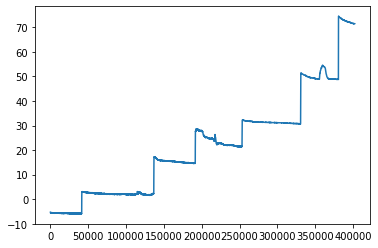

In [10]:
plt.plot(res)

